In [1]:
import matplotlib.pyplot as plt
import numpy as np
import healpy as hp
from data_prep import DataPrep
from rfi_flagging import RFI_flagging
import helper_functions as hf
from gsm_data import GSMData, get_desired_frequencies

In [2]:
instrument = '100MHz'
channel = 'EW'
year = '2021'

In [3]:
# horizon profile
SHAPES = np.load('horizon_profile.npz')
profile, az = SHAPES['profile'], SHAPES['azimuth']

In [4]:
minperbin=2
gsm = GSMData(instrument, channel, minperbin, horizon=profile)

In [5]:
beam_dict = gsm.beam_dict
healpy_beam = gsm.healpy_beam 
healpy_horizon = gsm.healpy_horizon

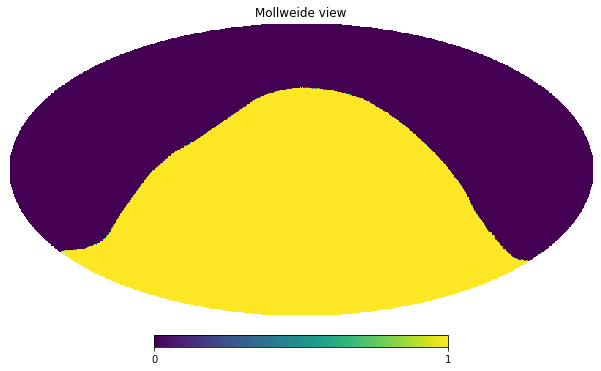

In [6]:
hp.mollview(healpy_horizon)

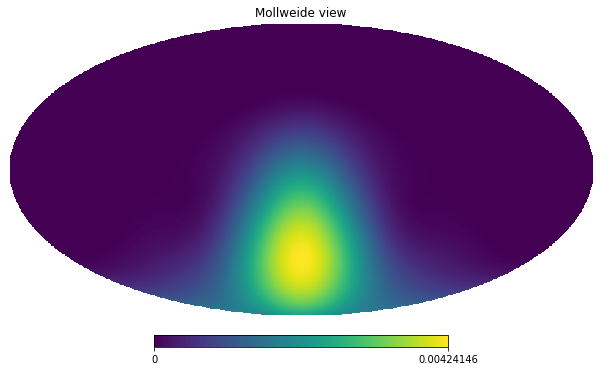

In [7]:
f = 60
hp.mollview(healpy_beam[f])
# hp.graticule()

In [161]:
Tgsm_nohor = np.load('GSM_averages/100MHz_NS_GSM_average_2minbins_0align.npy')
Tgsm = np.load('GSM_averages/100MHz_NS_GSM_average_2minbins_horizon_0align.npy')

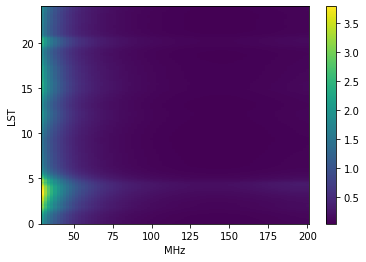

In [143]:
plt.xlabel('MHz')
plt.ylabel('LST')
plt.pcolormesh(np.arange(30,202,2), np.linspace(0,24,720), Tgsm_nohor - Tgsm, shading='nearest')
plt.colorbar()

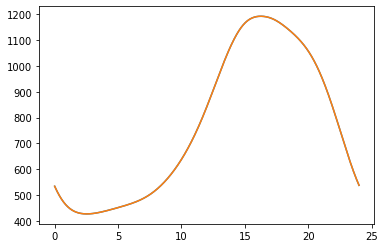

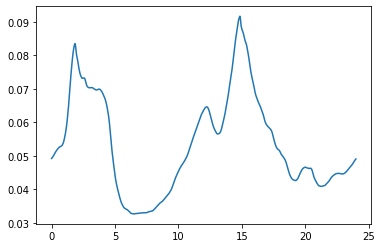

In [162]:
f = 70
plt.plot(np.linspace(0,24,720), Tgsm_nohor[:,f-25])
plt.plot(np.linspace(0,24,720), Tgsm[:,f-25])
plt.show()

plt.plot(np.linspace(0,24,720), Tgsm_nohor[:,f-25] - Tgsm[:, f-25])

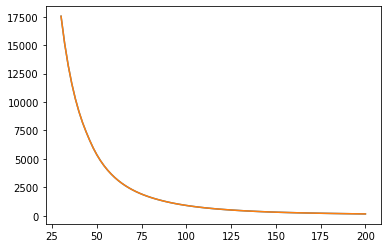

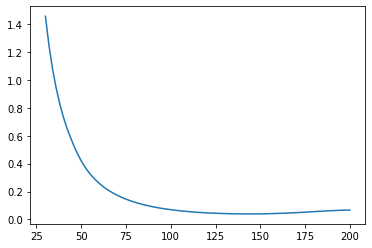

In [142]:
t = 240 # 25
plt.plot(np.arange(30,202,2), Tgsm_nohor[t])
plt.plot(np.arange(30,202,2), Tgsm[t])
plt.show()

plt.plot(np.arange(30,202,2), Tgsm_nohor[t] - Tgsm[t])

### Beam Comparison (PRIZM, MIST, SHAPES case study)

#### SHAPES case study

In [24]:
def alpha(nu):
    return 115 - 0.3 * nu + 0.001 * nu**2

def B(nu, theta):
    return np.exp(-4 * np.log(2) * (theta / alpha(nu))**2)

In [131]:
X,Y = np.meshgrid(np.arange(30,202,2), np.arange(0,90))

In [132]:
SHAPES_beam = B(X, Y)

#### MIST

In [133]:
FEKO_beam = np.load('../../MIST/Data/FEKO_beam_data_rot76.npz')
FEKO_rad_eff = np.load('../../MIST/Data/FEKO_rad_eff.npz')

gain = FEKO_beam['gain']
AZ = FEKO_beam['AZ']
EL = FEKO_beam['EL']

eff = FEKO_rad_eff['eff']

beam = gain / (eff[:,None,None]/100)

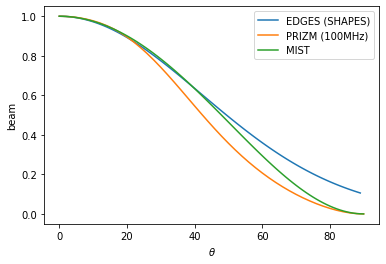

In [135]:
f = 70
t=150
plt.ylabel('beam')
plt.xlabel(r'$\theta$')
plt.plot(range(0,90), SHAPES_beam[:,(f-30) // 2], label='EDGES (SHAPES)')
plt.plot(beam_dict['theta']*180/np.pi, 10**(beam_dict[f][t//2] / 10) / np.max(10**(beam_dict[f][t] / 10)), label='PRIZM (100MHz)')
plt.plot(90-EL, beam[f-25,:, t]/np.max(beam[f-25,:, t]), label='MIST')
plt.legend()